In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import linear_model, decomposition, datasets
from sklearn import svm
import math

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 10000)
parkingdata.size

130000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
4654602,Victoria Market,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,4,6609S,13/02/2012 01:39:58 PM,13/02/2012 01:54:14 PM,856,LZ 30M M-F 7:30-19:30,0,681,2831
9284900,Queensberry,ROSSLYN STREET,HOWARD STREET,WILLIAM STREET,1,C7156,04/07/2012 11:55:47 AM,04/07/2012 03:45:26 PM,13779,4P MTR M-F 7:30-18:30,0,1214,5316
6563085,Courtney,QUEENSBERRY STREET,PEEL STREET,O'CONNELL STREET,3,7680N,11/04/2012 05:50:02 PM,11/04/2012 05:51:38 PM,96,1/4P M-SUN 7:30-22:00,0,1175,4122
4849437,Supreme,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,1,C3054,18/02/2012 05:51:41 PM,18/02/2012 05:53:31 PM,110,1P MTR M-SAT 7:30-19:30,0,894,2122
11345805,Spencer,SPENCER STREET,COLLINS STREET,FLINDERS LANE,2,1516E,04/09/2012 03:29:49 PM,04/09/2012 03:49:29 PM,1180,1/2P MTR M-F 9:30-16:00,0,1285,5699


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
3391107,Hyatt,COLLINS STREET,RUSSELL STREET,EXHIBITION STREET,3,1910N,06/01/2012 09:01:05 AM,06/01/2012 09:04:01 AM,176,1P TKT A M-SAT 7:30-19:30,0,528,1199
9696825,Magistrates,LA TROBE STREET,KING STREET,WILLIAM STREET,4,3927S,16/07/2012 05:34:05 PM,16/07/2012 05:35:15 PM,70,2P TKT A M-SAT 7:30-20:30,0,856,5096
10572565,Hyatt,FLINDERS LANE,EXHIBITION STREET,SPRING STREET,3,1740N,11/08/2012 04:59:22 PM,11/08/2012 06:11:54 PM,4352,1P MTR M-SAT 7:30-19:30,1,669,1454
10968650,The Mac,FRANKLIN STREET,SWANSTON STREET,VICTORIA STREET,1,C6472,23/08/2012 04:35:46 PM,23/08/2012 04:40:27 PM,281,2P MTR M-SAT 7:30-20:30,0,681,2900
3616154,Victoria Market,QUEEN STREET,VICTORIA STREET,THERRY STREET,1,C4978,13/01/2012 09:26:42 AM,13/01/2012 11:52:22 AM,8740,1P MTR M-SAT 6:00-19:30,1,1171,3323


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1037
Princes Theatre     739
Southbank           687
Victoria Market     679
The Mac             632
Regency             628
Hyatt               569
Titles              552
County              457
Rialto              442
Courtney            407
Chinatown           402
City Square         383
Spencer             382
Magistrates         374
Banks               369
Hardware            368
RACV                317
Jolimont            313
Supreme             159
Tavistock            59
Docklands            41
West Melbourne        4
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
4654602,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,4,6609S,13/02/2012 01:39:58 PM,13/02/2012 01:54:14 PM,856,LZ 30M M-F 7:30-19:30,0,681,2831
9284900,QUEENSBERRY,ROSSLYN STREET,HOWARD STREET,WILLIAM STREET,1,C7156,04/07/2012 11:55:47 AM,04/07/2012 03:45:26 PM,13779,4P MTR M-F 7:30-18:30,0,1214,5316
6563085,COURTNEY,QUEENSBERRY STREET,PEEL STREET,O'CONNELL STREET,3,7680N,11/04/2012 05:50:02 PM,11/04/2012 05:51:38 PM,96,1/4P M-SUN 7:30-22:00,0,1175,4122
4849437,SUPREME,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,1,C3054,18/02/2012 05:51:41 PM,18/02/2012 05:53:31 PM,110,1P MTR M-SAT 7:30-19:30,0,894,2122
11345805,SPENCER,SPENCER STREET,COLLINS STREET,FLINDERS LANE,2,1516E,04/09/2012 03:29:49 PM,04/09/2012 03:49:29 PM,1180,1/2P MTR M-F 9:30-16:00,0,1285,5699


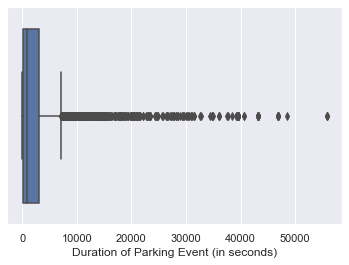

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])

In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             991
QUEEN STREET                732
LA TROBE STREET             547
EXHIBITION STREET           530
FRANKLIN STREET             525
COLLINS STREET              503
ELIZABETH STREET            481
RUSSELL STREET              476
BOURKE STREET               408
LT LONSDALE STREET          332
LT COLLINS STREET           310
SPRING STREET               270
FLINDERS LANE               250
KING STREET                 248
ERROL STREET                221
WILLIAM STREET              210
LT BOURKE STREET            178
COVENTRY STREET             171
A'BECKETT STREET            166
VICTORIA STREET             147
FLINDERS STREET             147
SPENCER STREET              124
QUEENSBERRY STREET          123
CAPEL STREET                118
DORCAS STREET               106
O'CONNELL STREET             97
ALBERT STREET                96
THERRY STREET                90
GRANT STREET                 87
LEVESON STREET               81
KAVANAGH STREET              72
COBDEN S

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            925
QUEEN STREET           779
QUEENSBERRY STREET     667
WILLIAM STREET         585
RUSSELL STREET         567
SPENCER STREET         498
SWANSTON STREET        460
EXHIBITION STREET      452
LT LONSDALE STREET     431
LONSDALE STREET        354
VICTORIA STREET        336
LT COLLINS STREET      313
COLLINS STREET         275
BOURKE STREET          272
ELIZABETH STREET       263
LT BOURKE STREET       229
FLINDERS LANE          202
LA TROBE STREET        182
A'BECKETT STREET       150
WELLS STREET           145
FRANKLIN STREET        139
WILLAM STREET          135
THERRY STREET          125
SOUTHBANK BOULEVARD    108
STURT STREET           105
DODDS STREET            96
KINGS WAY               96
FLINDERS STREET         94
ERROL STREET            91
O'CONNELL STREET        85
COBDEN STREET           70
HOWARD STREET           66
MACARTHUR STREET        65
BALSTON STREET          57
PEEL STREET             56
VICTORIA PARADE         53
PELHAM STREET           49
A

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET        897
VICTORIA STREET       843
ELIZABETH STREET      808
QUEEN STREET          713
EXHIBITION STREET     557
KING STREET           498
LONSDALE STREET       459
SPRING STREET         456
RUSSELL STREET        374
FLINDERS LANE         369
LT BOURKE STREET      354
COLLINS STREET        313
LA TROBE STREET       273
LT COLLINS STREET     272
SWANSTON STREET       263
BOURKE STREET         229
LT LONSDALE STREET    207
FLINDERS STREET       202
DODDS STREET          152
ST KILDA ROAD         145
FRANKLIN STREET       125
LANSDOWNE STREET      111
LEVESON STREET         91
POWER STREET           87
THERRY STREET          84
QUEENSBERRY STREET     83
A'BECKETT STREET       76
WELLS STREET           67
WALSH STREET           67
CAPEL STREET           56
HAWKE STREET           54
ELM STREET             52
STURT STREET           47
KAVANAGH STREET        46
MILES STREET           46
GRANT STREET           44
GISBORNE STREET        40
DUDLEY STREET          35
MILTON STREE

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
4654602,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,4,6609S,2012-02-13 13:39:58,2012-02-13 13:54:14,856,LZ 30M M-F 7:30-19:30,0,681,2831
9284900,QUEENSBERRY,ROSSLYN STREET,HOWARD STREET,WILLIAM STREET,1,C7156,2012-04-07 11:55:47,2012-04-07 15:45:26,13779,4P MTR M-F 7:30-18:30,0,1214,5316
6563085,COURTNEY,QUEENSBERRY STREET,PEEL STREET,O'CONNELL STREET,3,7680N,2012-11-04 17:50:02,2012-11-04 17:51:38,96,1/4P M-SUN 7:30-22:00,0,1175,4122
4849437,SUPREME,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,1,C3054,2012-02-18 17:51:41,2012-02-18 17:53:31,110,1P MTR M-SAT 7:30-19:30,0,894,2122
11345805,SPENCER,SPENCER STREET,COLLINS STREET,FLINDERS LANE,2,1516E,2012-04-09 15:29:49,2012-04-09 15:49:29,1180,1/2P MTR M-F 9:30-16:00,0,1285,5699


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
3391107,HYATT,COLLINS STREET,RUSSELL STREET,EXHIBITION STREET,3,1910N,2012-06-01 09:01:05,2012-06-01 09:04:01,176,1P TKT A M-SAT 7:30-19:30,0,528,1199
9696825,MAGISTRATES,LA TROBE STREET,KING STREET,WILLIAM STREET,4,3927S,2012-07-16 17:34:05,2012-07-16 17:35:15,70,2P TKT A M-SAT 7:30-20:30,0,856,5096
10572565,HYATT,FLINDERS LANE,EXHIBITION STREET,SPRING STREET,3,1740N,2012-11-08 16:59:22,2012-11-08 18:11:54,4352,1P MTR M-SAT 7:30-19:30,1,669,1454
10968650,THE MAC,FRANKLIN STREET,SWANSTON STREET,VICTORIA STREET,1,C6472,2012-08-23 16:35:46,2012-08-23 16:40:27,281,2P MTR M-SAT 7:30-20:30,0,681,2900
3616154,VICTORIA MARKET,QUEEN STREET,VICTORIA STREET,THERRY STREET,1,C4978,2012-01-13 09:26:42,2012-01-13 11:52:22,8740,1P MTR M-SAT 6:00-19:30,1,1171,3323


### SVM Classification Model on Predicitive Analytics question 3

In [19]:
#Target field identification
target = parkingdata['Street Name']

unique_vals = target.unique()
target.replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

target.head(10)

4654602     0
9284900     1
6563085     2
4849437     3
11345805    4
8924605     3
5250502     5
5406031     6
9685136     7
3396411     8
Name: Street Name, dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('Street Name', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('In Violation?', axis = 1, inplace = True)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['In Violation?'] = parkingdata['In Violation?']
features['Side Of Street'] = parkingdata['Side Of Street']
features['Duration of Parking Event (in seconds)'] = parkingdata['Duration of Parking Event (in seconds)']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Between Street 1,Between Street 2,Sign,In Violation?,Side Of Street,Duration of Parking Event (in seconds),Street ID,Device ID,Arrival Hour,Departure Hour
4654602,0,0,0,0,0,4,856,681,2831,13,13
9284900,1,1,1,1,0,1,13779,1214,5316,11,15
6563085,2,2,2,2,0,3,96,1175,4122,17,17
4849437,3,3,3,3,0,1,110,894,2122,17,17
11345805,4,4,4,4,0,2,1180,1285,5699,15,15
8924605,5,5,5,3,0,1,1103,894,6861,12,12
5250502,6,6,6,3,0,2,289,1171,712,16,16
5406031,1,7,7,1,0,1,11248,881,3801,13,16
9685136,7,8,8,5,0,4,94,202,6154,13,13
3396411,2,7,7,6,0,2,1593,627,3188,10,11


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
param_grid = {'C': np.logspace(-4, 4, 20), 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
             'max_iter' : [100, 1000, 2500, 5000]}

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 5, 
                                    n_repeats = 1, 
                                    random_state = 1)
        

clf_GS = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv = cv_method, verbose=True, scoring = 'accuracy', return_train_score = True, n_jobs=-1)

In [23]:
#Fit the model with the dataset
best_clf = clf_GS.fit(features, target)
#LogisticRegression().get_params().keys()

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 87.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 129.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 180.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 240.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 309.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 386.9min
[Parallel(n_jobs

In [24]:
clf_GS.best_params_

{'C': 0.0018329807108324356, 'gamma': 1, 'kernel': 'linear', 'max_iter': 5000}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_gamma = best_clf.best_estimator_.get_params()['gamma']
best_C = best_clf.best_estimator_.get_params()['C']
best_max =  best_clf.best_estimator_.get_params()['max_iter']
best_kernel =  best_clf.best_estimator_.get_params()['kernel']

print('Best gamma:', best_gamma)
print('Best C:', best_C)
print('Best max iteration:', best_max)
print('Best kernel:', best_kernel)

Best gamma: 1
Best C: 0.0018329807108324356
Best max iteration: 5000
Best kernel: linear


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_svm = pd.DataFrame(clf_GS.cv_results_['params'])
results_svm['test_score'] = clf_GS.cv_results_['mean_test_score']
results_svm

,C,gamma,kernel,max_iter,test_score
0,0.000100,1.000,rbf,100,0.1087
1,0.000100,1.000,rbf,1000,0.0991
2,0.000100,1.000,rbf,2500,0.0991
3,0.000100,1.000,rbf,5000,0.0991
4,0.000100,1.000,poly,100,0.0516
5,0.000100,1.000,poly,1000,0.1009
6,0.000100,1.000,poly,2500,0.1410
7,0.000100,1.000,poly,5000,0.1786
8,0.000100,1.000,sigmoid,100,0.0525
9,0.000100,1.000,sigmoid,1000,0.0991


In [27]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
SVM = metric = SVC(  C = best_C,
                               gamma = best_gamma, 
                               kernel = best_kernel, 
                               max_iter = best_max 
                               )

In [28]:
# Hill climbing w/ SVM
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = SVM.fit(x_train, y_train)
    cur_Score = SVM.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.1455


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 2 selected features: 0.162


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 3 selected features: 0.162


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 4 selected features: 0.1625


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 5 selected features: 0.194


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 6 selected features: 0.3625


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 7 selected features: 0.976


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 8 selected features: 0.976


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 9 selected features: 0.976

Indexs of the desired features
[2, 3, 4, 9, 1, 0, 7, 10, 5]


In [29]:
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 2,Sign,In Violation?,Arrival Hour,Between Street 1,Area Name,Street ID,Departure Hour,Side Of Street
4654602,0,0,0,13,0,0,681,13,4
9284900,1,1,0,11,1,1,1214,15,1
6563085,2,2,0,17,2,2,1175,17,3
4849437,3,3,0,17,3,3,894,17,1
11345805,4,4,0,15,4,4,1285,15,2
8924605,5,3,0,12,5,5,894,12,1
5250502,6,3,0,16,6,6,1171,16,2
5406031,7,1,0,13,7,1,881,16,1
9685136,8,5,0,13,8,7,202,13,4
3396411,7,6,0,10,7,2,627,11,2


In [30]:
bestModel = clf_GS.fit(features_hc, target)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 60.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 90.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 121.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 156.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 193.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 233.0min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 277.2min
[Parallel(n_jobs

In [31]:
clf_GS.best_params_

{'C': 0.0001, 'gamma': 1, 'kernel': 'poly', 'max_iter': 1000}

In [32]:
#Find the best values for the  parameters of the model (Formatted output)
best_gamma = best_clf.best_estimator_.get_params()['gamma']
best_C = best_clf.best_estimator_.get_params()['C']
best_max =  best_clf.best_estimator_.get_params()['max_iter']
best_kernel =  best_clf.best_estimator_.get_params()['kernel']

print('Best gamma:', best_gamma)
print('Best C:', best_C)
print('Best max iteration:', best_max)
print('Best kernel:', best_kernel)

Best gamma: 1
Best C: 0.0001
Best max iteration: 1000
Best kernel: poly


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset
results_svm = pd.DataFrame(clf_GS.cv_results_['params'])
results_svm['test_score'] = clf_GS.cv_results_['mean_test_score']
results_svm

,C,gamma,kernel,max_iter,test_score
0,0.000100,1.000,rbf,100,0.6776
1,0.000100,1.000,rbf,1000,0.0991
2,0.000100,1.000,rbf,2500,0.0991
3,0.000100,1.000,rbf,5000,0.0991
4,0.000100,1.000,poly,100,0.9942
5,0.000100,1.000,poly,1000,0.9993
6,0.000100,1.000,poly,2500,0.9993
7,0.000100,1.000,poly,5000,0.9993
8,0.000100,1.000,sigmoid,100,0.0525
9,0.000100,1.000,sigmoid,1000,0.0991


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
SVM = metric = SVC(  C = best_C,
                               gamma = best_gamma, 
                               kernel = best_kernel, 
                               max_iter = best_max 
                               )

In [35]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
SVM.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = SVM.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)

#Printing the numerical result of the confusion matrix
print("\n[Train/test split] score: {:.5f}".format(SVM.score(x_test, y_test)))

C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix
[[245   0   0 ...   0   0   0]
 [  0  17   0 ...   0   0   0]
 [  0   0  57 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0  10   0]
 [  0   0   0 ...   0   0   0]]

[Train/test split] score: 0.99720
